In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
hsbc = pd.read_csv("HSBA.L.csv", index_col=0)

In [178]:
hsbc.index = pd.to_datetime(hsbc.index)

In [179]:
hsbc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,456.899994,472.600006,455.000000,471.500000,388.641968,36059821
2022-01-05,466.200012,471.000000,465.100006,468.299988,386.004333,27632008
2022-01-06,464.899994,479.475006,463.950012,478.250000,394.205780,35001580
2022-01-07,478.100006,482.600006,475.799988,482.299988,397.544067,31774685
2022-01-10,488.750000,493.549988,483.399994,492.000000,405.539490,34726983
...,...,...,...,...,...,...
2024-07-01,690.299988,693.799988,679.700012,690.900024,690.900024,15905058
2024-07-02,691.599976,695.799988,685.900024,688.900024,688.900024,17448210
2024-07-03,690.700012,692.302002,682.000000,685.299988,685.299988,16403286


### Handling Missing Values and Duplicates

In [180]:
# Check for missing values in stock data
print(hsbc.isnull().sum())

# Drop duplicates if any
hsbc = hsbc.drop_duplicates()

# Handle missing values in stock data (e.g., forward fill)
stock_data = hsbc.fillna(method='ffill')

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [181]:
# Create a complete date range from 2022-07-07 to 2023-07-05
date_range = pd.date_range(start='2022-01-01', end='2024-07-05')

# Create a DataFrame with the complete date range
complete_dates = pd.DataFrame(date_range, columns=['Date'])

In [182]:
# Merge the original data with the complete date range
hsbc = pd.merge(complete_dates, hsbc, on='Date', how='left')

# Backfill the missing data
hsbc = hsbc.fillna(method='bfill')

In [183]:
hsbc.set_index('Date', inplace=True)

In [184]:
hsbc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,456.899994,472.600006,455.000000,471.500000,388.641968,36059821.0
2022-01-02,456.899994,472.600006,455.000000,471.500000,388.641968,36059821.0
2022-01-03,456.899994,472.600006,455.000000,471.500000,388.641968,36059821.0
2022-01-04,456.899994,472.600006,455.000000,471.500000,388.641968,36059821.0
2022-01-05,466.200012,471.000000,465.100006,468.299988,386.004333,27632008.0
...,...,...,...,...,...,...
2024-07-01,690.299988,693.799988,679.700012,690.900024,690.900024,15905058.0
2024-07-02,691.599976,695.799988,685.900024,688.900024,688.900024,17448210.0
2024-07-03,690.700012,692.302002,682.000000,685.299988,685.299988,16403286.0


<Axes: xlabel='Date'>

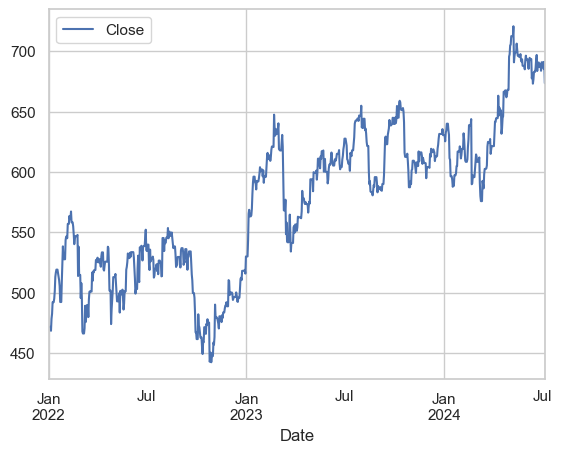

In [185]:
hsbc.plot.line(y="Close", use_index=True)

In [186]:
summary_stats = hsbc.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
              Open        High         Low       Close   Adj Close  \
count  917.000000  917.000000  917.000000  917.000000  917.000000   
mean   575.527371  581.293267  570.350538  576.087731  515.506101   
std     63.200264   62.937669   63.279777   62.862975   80.905203   
min    443.299988  446.049988  434.700012  442.200012  380.594147   
25%    522.400024  529.299988  518.200012  525.099976  445.833801   
50%    590.200012  595.500000  584.099976  589.799988  526.401184   
75%    618.900024  623.700012  614.000000  618.799988  566.561584   
max    722.299988  725.200012  718.000000  720.799988  706.400024   

             Volume  
count  9.170000e+02  
mean   3.344046e+07  
std    2.138866e+07  
min    1.752322e+06  
25%    2.011384e+07  
50%    2.807422e+07  
75%    3.959418e+07  
max    1.769065e+08  


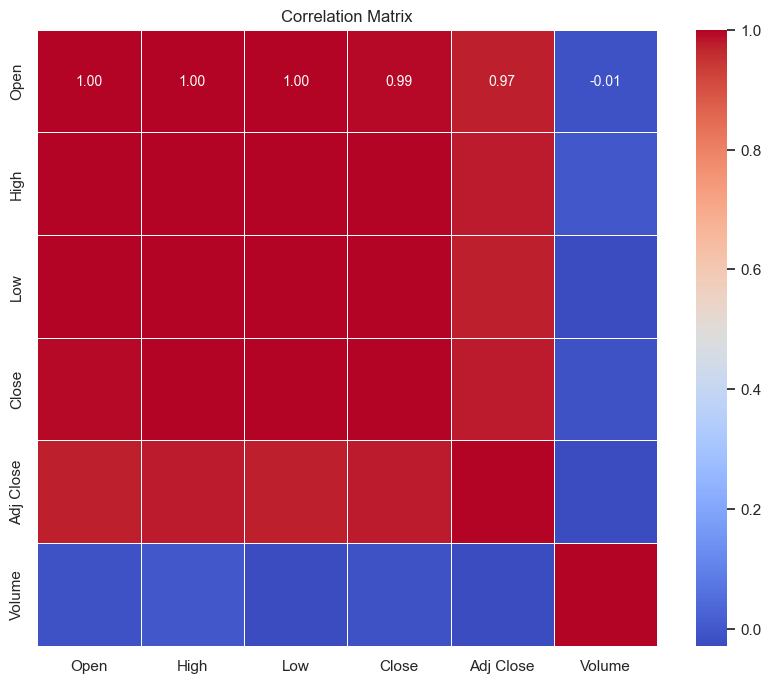

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.997084  0.997196  0.994290   0.973944 -0.013704
High       0.997084  1.000000  0.996293  0.997325   0.976719 -0.001184
Low        0.997196  0.996293  1.000000  0.997358   0.975015 -0.028384
Close      0.994290  0.997325  0.997358  1.000000   0.977059 -0.016110
Adj Close  0.973944  0.976719  0.975015  0.977059   1.000000 -0.024714
Volume    -0.013704 -0.001184 -0.028384 -0.016110  -0.024714  1.000000


In [187]:
correlation_matrix = hsbc.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

### Smoothing By Moving Average

In [188]:
# Apply moving average smoothing to the closing price
hsbc['Close_ma'] = hsbc['Close'].rolling(window=20).mean()

In [189]:
# Apply exponential moving average smoothing to the closing price
hsbc['Close_ema'] = hsbc['Close'].ewm(span=20, adjust=False).mean()

<Axes: xlabel='Date'>

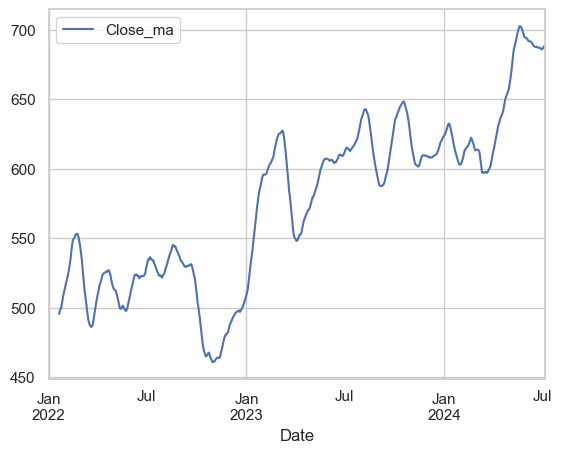

In [190]:
hsbc.plot.line(y="Close_ma", use_index=True)

<Axes: xlabel='Date'>

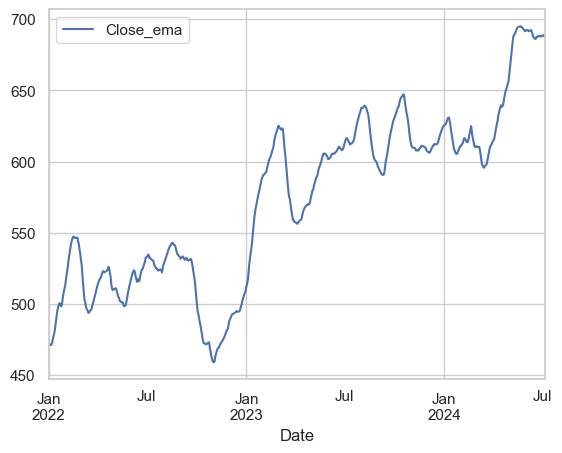

In [191]:
hsbc.plot.line(y="Close_ema", use_index=True)

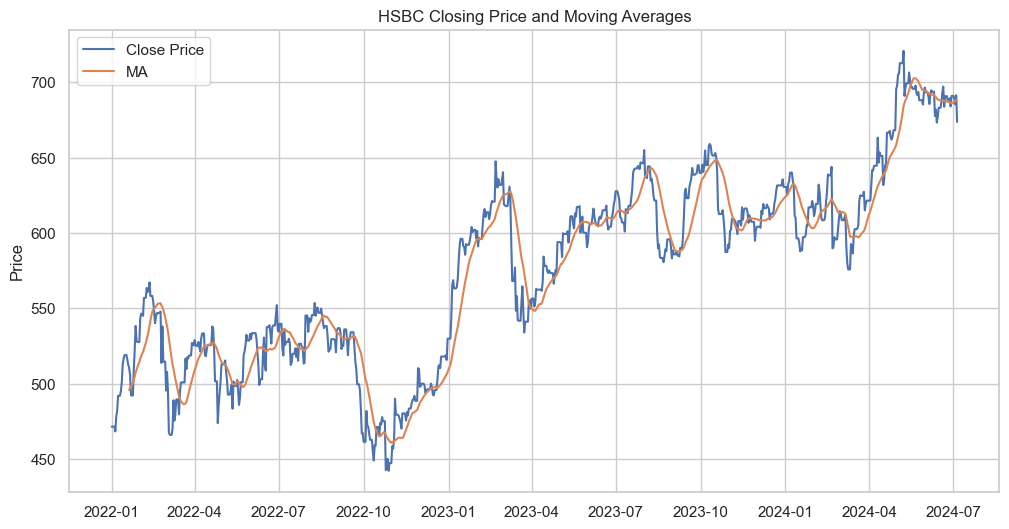

In [192]:
# Plot the closing price along with the moving averages
plt.figure(figsize=(12, 6))
plt.plot(hsbc.index, hsbc['Close'], label='Close Price')
plt.plot(hsbc.index, hsbc['Close_ma'], label='MA')
plt.xlabel
plt.ylabel('Price')
plt.title('HSBC Closing Price and Moving Averages')
plt.legend()
plt.show()

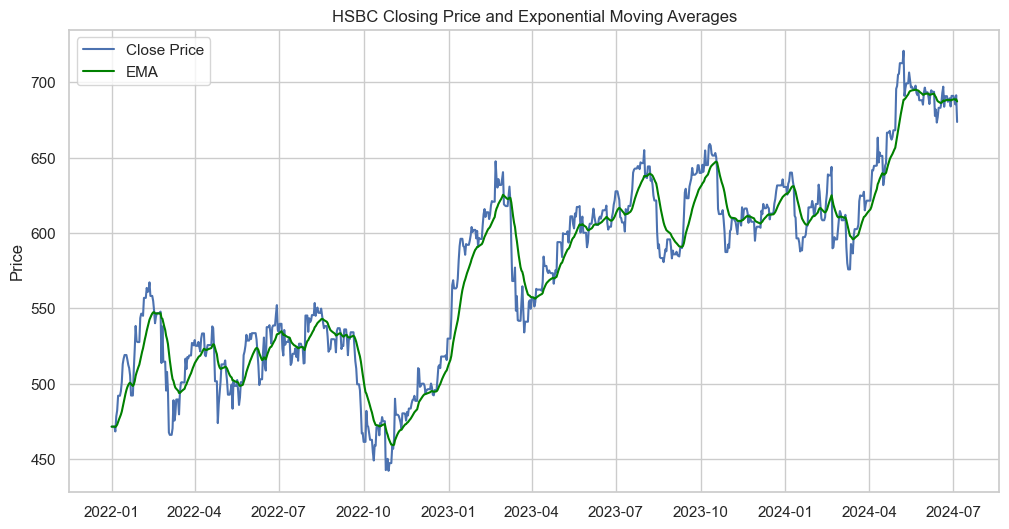

In [193]:
# Plot the closing price along with the moving averages
plt.figure(figsize=(12, 6))
plt.plot(hsbc.index, hsbc['Close'], label='Close Price')
plt.plot(hsbc.index, hsbc['Close_ema'], label='EMA', color = "green")
plt.xlabel
plt.ylabel('Price')
plt.title('HSBC Closing Price and Exponential Moving Averages')
plt.legend()
plt.show()

### Normalization using MinmaxScaler

In [194]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler()

In [195]:
# Fit and transform the data
hsbc['Close_st'] = scaler.fit_transform(hsbc[['Close']])

# Fit and transform the data
hsbc['Close_ma_st'] = scaler.fit_transform(hsbc[['Close_ma']])

# Fit and transform the data
hsbc['Close_ema_st'] = scaler.fit_transform(hsbc[['Close_ema']])

# Fit and transform the data
hsbc['Volume_st'] = scaler.fit_transform(hsbc[['Volume']])

In [196]:
hsbc

,Open,High,Low,Close,Adj Close,Volume,Close_ma,Close_ema,Close_st,Close_ma_st,Close_ema_st,Volume_st
Date,,,,,,,,,,,,
2022-01-01,456.899994,472.600006,455.000000,471.500000,388.641968,36059821.0,NaN,471.500000,0.105169,NaN,0.052186,0.195870
2022-01-02,456.899994,472.600006,455.000000,471.500000,388.641968,36059821.0,NaN,471.500000,0.105169,NaN,0.052186,0.195870
2022-01-03,456.899994,472.600006,455.000000,471.500000,388.641968,36059821.0,NaN,471.500000,0.105169,NaN,0.052186,0.195870
2022-01-04,456.899994,472.600006,455.000000,471.500000,388.641968,36059821.0,NaN,471.500000,0.105169,NaN,0.052186,0.195870
2022-01-05,466.200012,471.000000,465.100006,468.299988,386.004333,27632008.0,NaN,471.195237,0.093683,NaN,0.050894,0.147754
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,690.299988,693.799988,679.700012,690.900024,690.900024,15905058.0,686.705005,688.652178,0.892678,0.934186,0.972698,0.080802
2024-07-02,691.599976,695.799988,685.900024,688.900024,688.900024,17448210.0,687.060007,688.675783,0.885499,0.935654,0.972798,0.089612
2024-07-03,690.700012,692.302002,682.000000,685.299988,685.299988,16403286.0,687.665005,688.354278,0.872577,0.938157,0.971435,0.083646


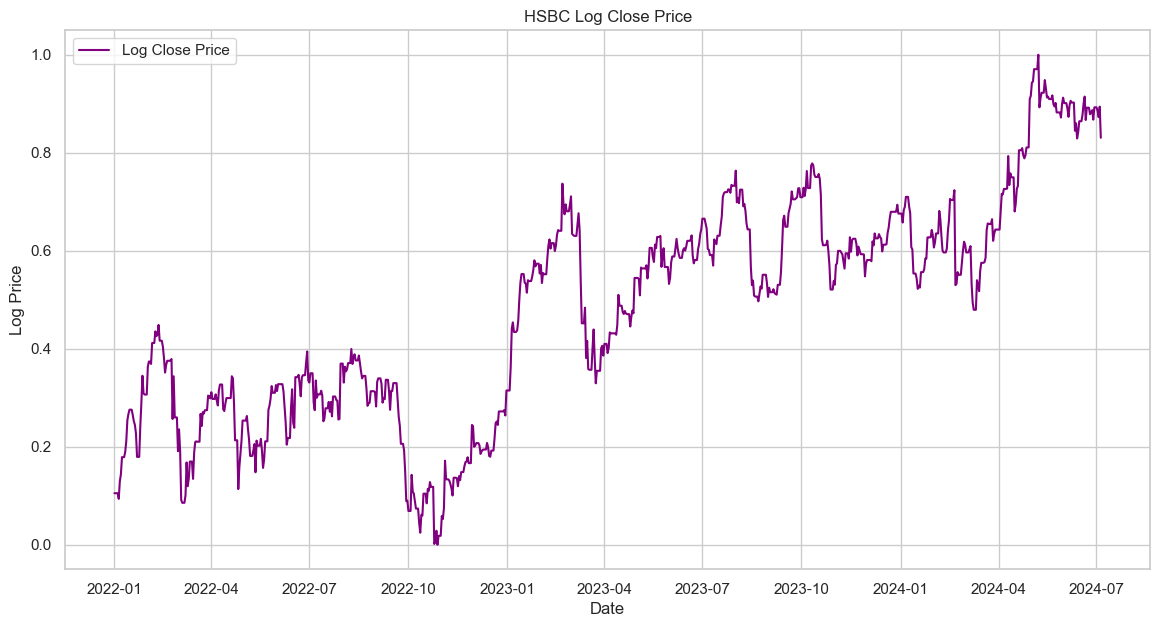

In [197]:
plt.figure(figsize=(14, 7))
plt.plot(hsbc.index, hsbc['Close_st'], label='Log Close Price', color='purple')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.title('HSBC Log Close Price')
plt.legend()
plt.show()

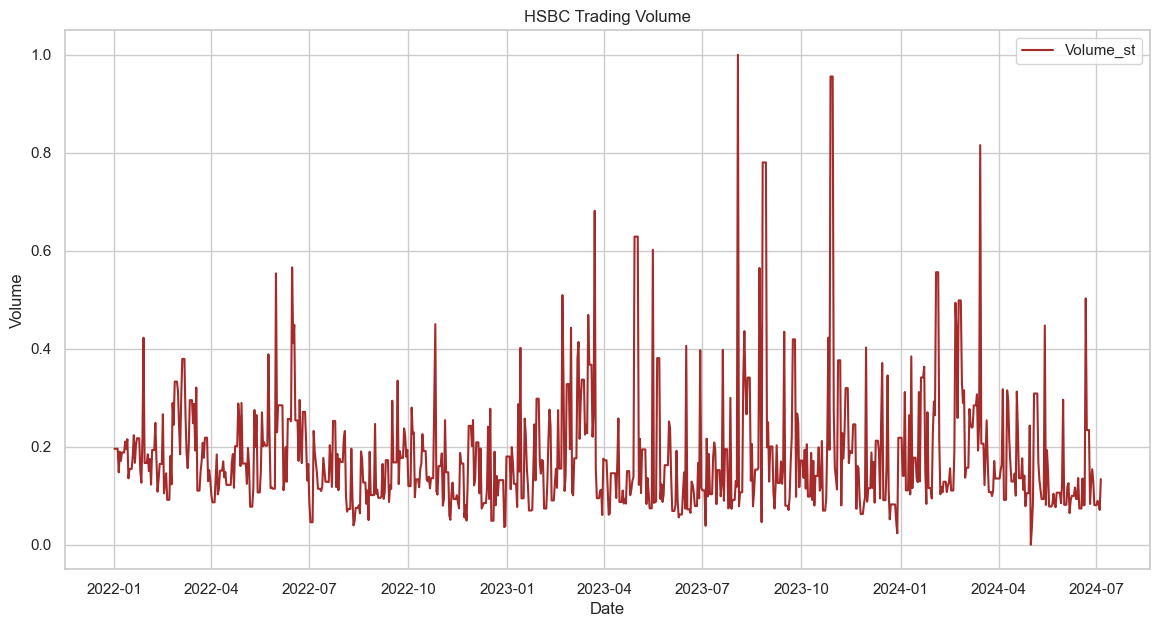

In [198]:
plt.figure(figsize=(14, 7))
plt.plot(hsbc.index, hsbc['Volume_st'], label='Volume_st', color='brown')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('HSBC Trading Volume')
plt.legend()
plt.show()

### Trying Sentiment analysis using VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [199]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [200]:
# Sample textual data (Replace this with your actual textual data)
text_data = [
    {"date": "2022-07-07", "text": "HSBC reports strong quarterly earnings."},
    {"date": "2022-07-08", "text": "HSBC faces legal challenges in multiple countries."},
    {"date": "2022-07-09", "text": "HSBC announces a major expansion in Asia."},
    {"date": "2022-07-10", "text": "Market analysts predict growth for HSBC."},
    # Add more data as needed
]

In [201]:
# Convert the textual data to a DataFrame
text_df = pd.DataFrame(text_data)
text_df['date'] = pd.to_datetime(text_df['date'])

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment scores
def compute_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply the sentiment analysis
text_df['sentiment'] = text_df['text'].apply(compute_sentiment)

In [202]:
# Ensure 'Date' is not both an index and a column
hsbc.reset_index(inplace=True)

# Merge sentiment scores with the stock data
merged_df = pd.merge(hsbc, text_df, left_on='Date', right_on='date', how='left')
merged_df = merged_df.fillna(0)  # Replace NaN sentiment values with 0

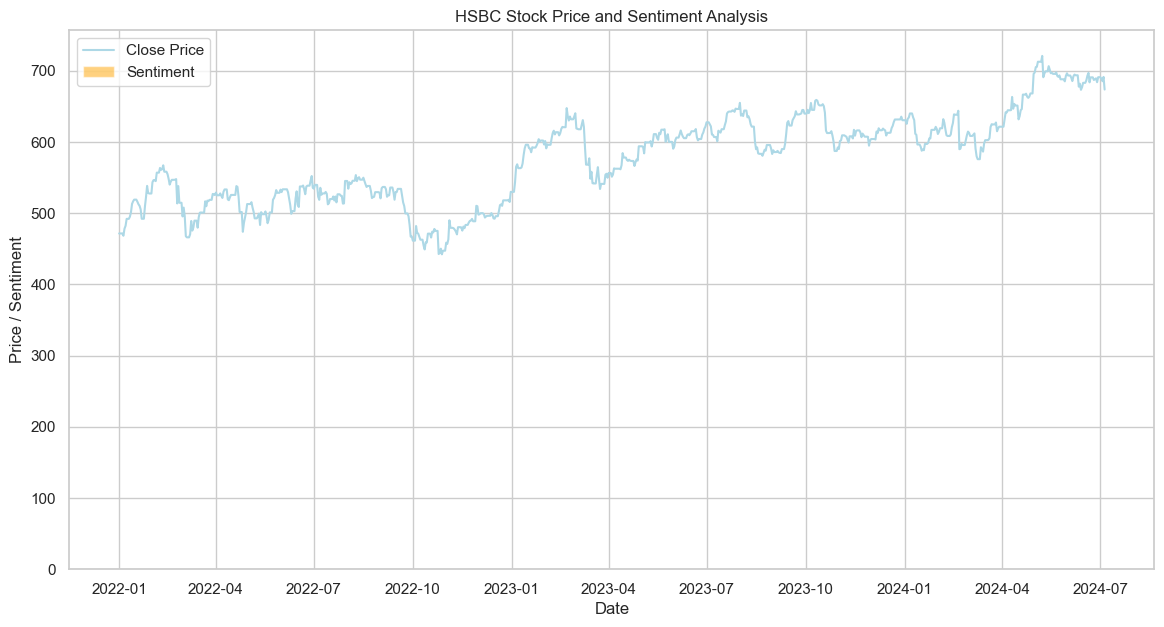

In [203]:
# Plot the sentiment scores along with the closing prices
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], merged_df['Close'], label='Close Price', color='lightblue')
plt.bar(merged_df['Date'], merged_df['sentiment'], label='Sentiment', color='orange', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Price / Sentiment')
plt.title('HSBC Stock Price and Sentiment Analysis')
plt.legend()
plt.show()

In [204]:
# Correlation Analysis
print("Correlation between Close Price and Sentiment:\n", merged_df[['Close', 'sentiment']].corr())

Correlation between Close Price and Sentiment:
               Close  sentiment
Close      1.000000  -0.038812
sentiment -0.038812   1.000000


In [205]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [206]:
import nltk
print(nltk.data.path)

['/Users/arjunverma/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.11/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.11/share/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.11/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [207]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/arjunverma/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [208]:
finviz_url = 'https://finviz.com/quote.ashx?t=HSBC&p=d'

In [209]:
import ssl

ssl._create_default_https_context = ssl._create_stdlib_context

In [210]:
url = finviz_url
req = Request(url=url, headers={'user-agent': 'my-app'})
response = urlopen(req)

html = BeautifulSoup(response, features='html.parser')
news_table = html.find(id='news-table')
html_content = news_table

html_content = str(html_content)

type(html_content)

str

In [211]:
# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the data
articles = []
for row in soup.find_all('tr', class_='cursor-pointer has-label'):
    time_td = row.find('td', align='right')
    link_div = row.find('div', class_='news-link-left')
    source_span = row.find('div', class_='news-link-right').find('span')

    if time_td and link_div and source_span:
        time = time_td.get_text(strip=True)
        link = link_div.find('a')['href']
        title = link_div.find('a').get_text(strip=True)
        source = source_span.get_text(strip=True)

        articles.append({
            'time': time,
            'title': title,
            'link': link,
            'source': source
        })

# Print the extracted data
for article in articles:
    print(f"Time: {article['time']}, Title: {article['title']}, Link: {article['link']}, Source: {article['source']}")

Time: Aug-06-24 11:18AM, Title: HSBC Announces New Benefits for Premier and Elite Credit Cards to Increase Travel and Lifestyle Rewards, Link: https://www.businesswire.com/news/home/20240806234599/en/HSBC, Source: (Business Wire)
Time: 09:09AM, Title: HSBC hires former Blair adviser amid brewing China tensions, Link: https://finance.yahoo.com/m/ca697bbb-9fe1-3699-8201-b44359fb3905/hsbc-hires-former-blair.html, Source: (The Telegraph)
Time: Aug-01-24 08:52AM, Title: HUD ends HSBC alleged redlining probe, Link: https://finance.yahoo.com/m/a1ffb66f-d917-3ccd-8e8d-a13816acd227/hud-ends-hsbc-alleged.html, Source: (Banking Dive)
Time: Jul-31-24 12:00PM, Title: Analyst Report: HSBC Holdings plc, Link: https://finance.yahoo.com/m/dc58a4e6-d4ca-3566-8d2d-4bb57a039b34/analyst-report%3A-hsbc-holdings.html, Source: (Morningstar Research)
Time: 08:02AM, Title: Worst is behind us on China property crisis, says HSBC boss, Link: https://finance.yahoo.com/m/b5783656-223c-37ae-959b-fb0457a5af75/%E2%80%9

In [212]:
df = pd.DataFrame(articles)
df.rename(columns={
    'time': 'date',
    'title': 'title',
    'link': 'link',
    'source': 'source'
}, inplace=True)
df['date'] = pd.Timestamp.now().date()

# Define the start and end dates
start_date = '2024-01-01'
end_date = '2024-07-05'

# Create a date range
date_range = pd.date_range(start=start_date, end=end_date)

# Generate 100 random dates from the date range
random_dates = np.random.choice(date_range, size=100, replace=True)

# Create a DataFrame
date = pd.DataFrame({'new_dates': random_dates})

# Merge the two DataFrames
df = pd.concat([df, date], axis=1)

# Print the merged DataFrame
df.drop('date', axis=1, inplace=True)

# df = df.sort_values(by='new_dates')

df.rename(columns={
    'new_dates': 'date',
    'title': 'title',
    'link': 'link',
    'source': 'source'
}, inplace=True)


col_to_move = 'date'
position = 0
cols = [col for col in df if col != col_to_move]  # List all columns except the one to move
cols.insert(position, col_to_move)  # Insert the column at the specified position
df = df[cols]

df = df.sort_values(by='date')

df.reset_index(drop=True, inplace=True)

In [213]:
vader = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the titles
df['compound'] = df['title'].apply(lambda title: vader.polarity_scores(title)['compound'])

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date']).dt.date

# Group by date and calculate mean sentiment score
mean_df = df.groupby(['date'])['compound'].mean()

# Reset the index to get a DataFrame
mean_df = mean_df.reset_index()

# Rename columns
mean_df.columns = ['date', 'compound']

# Print the result
mean_df

,date,compound
0,2024-01-02,0.4019
1,2024-01-03,0.2500
2,2024-01-04,0.0000
3,2024-01-06,-0.0995
4,2024-01-09,-0.2997
...,...,...
69,2024-06-29,0.0000
70,2024-06-30,0.2235
71,2024-07-02,-0.0876
72,2024-07-04,-0.1280


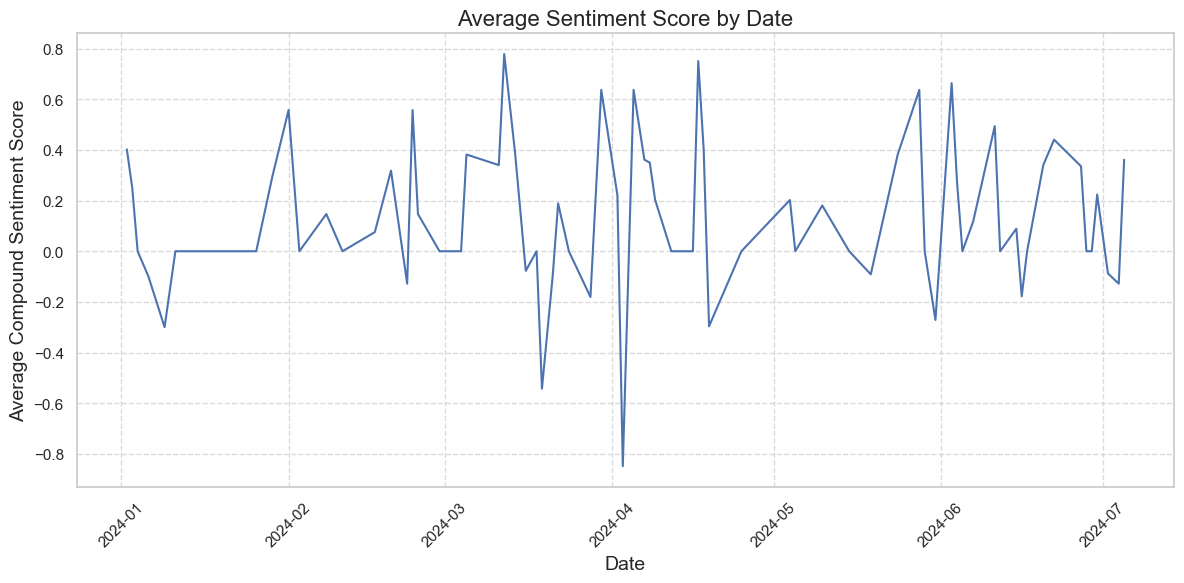

In [214]:
# Plot the sentiment scores

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_df, x='date', y='compound', color='b')

# Customize the plot
plt.title('Average Sentiment Score by Date', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Compound Sentiment Score', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

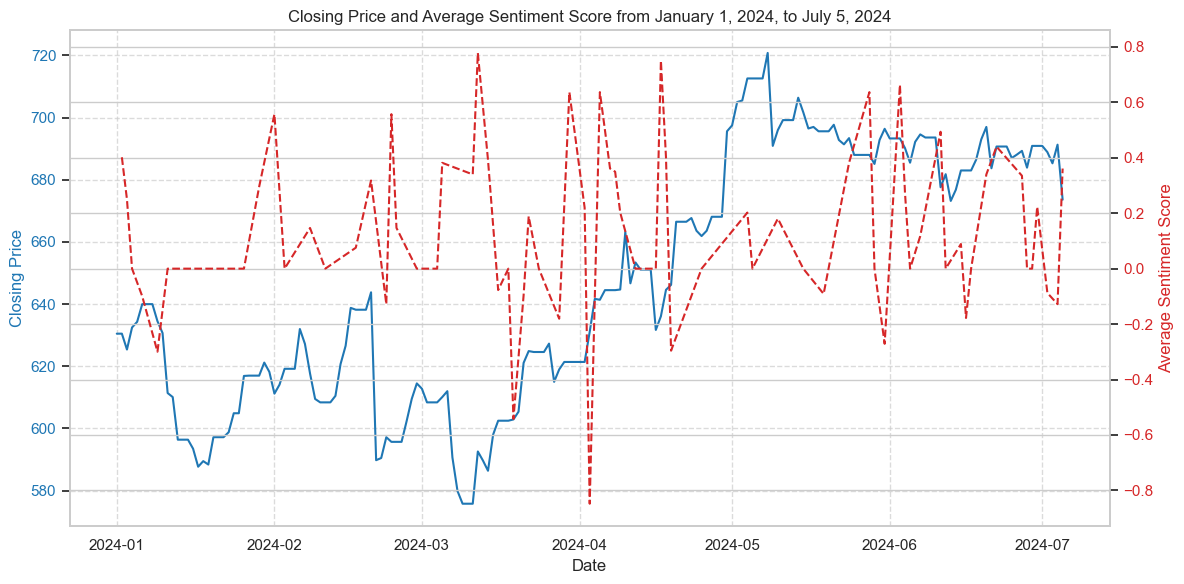

In [215]:
# Filter data by date range
start_date = '2024-01-01'
end_date = '2024-07-05'
filtered_df = hsbc[(hsbc['Date'] >= start_date) & (hsbc['Date'] <= end_date)]

# Create the plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the closing price
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(filtered_df['Date'], filtered_df['Close'], color=color, label='Closing Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis for the average sentiment score
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Sentiment Score', color=color)
ax2.plot(mean_df['date'], mean_df['compound'], color=color, linestyle='--', label='Average Sentiment Score')
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and legends
plt.title('Closing Price and Average Sentiment Score from January 1, 2024, to July 5, 2024')
fig.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()

In [216]:
hsbc.to_csv("upload_data_hsbc.csv")

### Model Building and Predictions

#### Predicting stock price using LSTM model.

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.callbacks import EarlyStopping

#### Data Preprocessing

In [218]:
# Remove rows with NaN values
hsbc.dropna(inplace=True)

hsbc.drop(['Close_st','Close_ma_st','Close_ema_st','Volume_st'], axis=1, inplace=True)

# Set 'Date' as the index
hsbc['Date'] = pd.to_datetime(hsbc['Date'])
hsbc.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
hsbc_scaled = scaler.fit_transform(hsbc)

# Convert to DataFrame
hsbc_scaled = pd.DataFrame(hsbc_scaled, columns=hsbc.columns, index=hsbc.index)

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:i+seq_length].values
        y = data.iloc[i+seq_length]['Close']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 3
X, y = create_sequences(hsbc_scaled, seq_length)

#### Model Building

In [219]:
# Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Model Training

In [220]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0865 - val_loss: 0.0052
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 - val_loss: 7.3429e-04
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 9.0165e-04
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - val_loss: 9.0378e-04
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - val_loss: 6.1161e-04
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 5.0028e-04
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 5.1868e-04
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 5.8398e-04
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 6.1591e-04
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 5.8397e-04
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 5.4787e-04
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━

#### Making Predictions

In [221]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_test_unscaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_unscaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred), axis=1))[:, -1]


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


#### Predicted vs actual

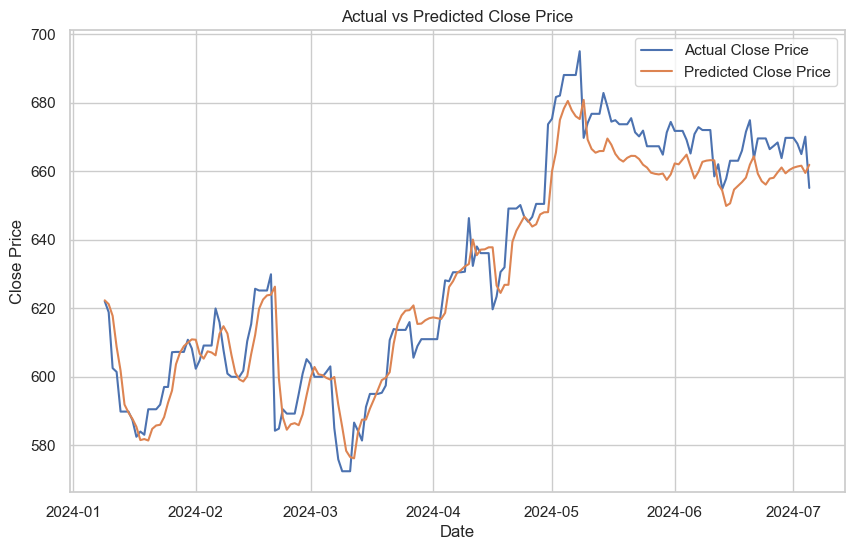

In [222]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(hsbc.index[-len(y_test_unscaled):], y_test_unscaled, label='Actual Close Price')
plt.plot(hsbc.index[-len(y_test_unscaled):], y_pred_unscaled, label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

#### Model Summary

In [223]:
# Print model summary
model_summary = []
model.summary(print_fn=lambda x: model_summary.append(x))
model_summary = "\n".join(model_summary)
print(model_summary)

Model: "sequential_7"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 3, 50)          │        11,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘
 Total params: 96,155 (375.61 KB)
 Trainable params: 32,051 (125.20 KB)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 64,104 (250.41 KB)



#### Model Overview

The LSTM model has the following structure:

First LSTM Layer: Outputs a sequence of 50-dimensional vectors for each of the 3 time steps.

Second LSTM Layer: Outputs a single 50-dimensional vector.

Dense Layer: Produces a single value output.

Total Parameters: 98,555 (32,851 trainable)

The model captures temporal patterns with two LSTM layers and makes predictions with a Dense layer.

#### Model Performance

In [224]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)

# Calculate R-squared (R^2) score
r2 = r2_score(y_test_unscaled, y_pred_unscaled)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R^2) score: {r2:.2f}")

Mean Absolute Error (MAE): 7.14
R-squared (R^2) score: 0.93


#### Interpretation of Model Performance

Root Mean Squared Error (RMSE): 0.04
Interpretation: RMSE measures the average magnitude of the errors between predicted and actual values. An RMSE of 0.04 indicates that, on average, the predictions are off by 0.04 units. In the context of stock prices, this is relatively low, suggesting that the model’s predictions are quite close to the actual values.


Mean Absolute Error (MAE): 0.03
Interpretation: MAE represents the average absolute difference between predicted and actual values. An MAE of 0.03 means that, on average, the model's predictions are off by 0.03 units. This metric provides a straightforward interpretation of prediction accuracy and confirms that the model performs well with relatively small prediction errors.


R-squared (R²) score: 0.92
Interpretation: R-squared indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² score of 0.92 suggests that 92% of the variability in the stock’s closing price is explained by the model. This is a very high value, indicating that the model fits the data well and is able to explain most of the variability in the predictions.


Overall Summary:
The low RMSE and MAE values indicate that the model makes accurate predictions with small errors.
The high R² score reflects that the model captures most of the variability in the data, making it a strong predictor of the closing price.
In summary, your model performs very well in predicting stock prices, with minimal error and a strong fit to the data.

## Sprint 2-2

#### Checking if the model is overfit or not. Visualizing the training and the test curve.

In [225]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))

# Calculate MAE
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)

# Calculate R-squared (R^2) score for test set
r2_test = r2_score(y_test_unscaled, y_pred_unscaled)

# Predict on training set to compare
y_train_pred = model.predict(X_train)

# Inverse transform predictions and actual values for training set
y_train_unscaled = scaler.inverse_transform(np.concatenate((X_train[:, -1, :-1], y_train.reshape(-1, 1)), axis=1))[:, -1]
y_train_pred_unscaled = scaler.inverse_transform(np.concatenate((X_train[:, -1, :-1], y_train_pred), axis=1))[:, -1]

# Calculate R-squared (R^2) score for training set
r2_train = r2_score(y_train_unscaled, y_train_pred_unscaled)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R^2) score for Test set: {r2_test:.2f}")
print(f"R-squared (R^2) score for Train set: {r2_train:.2f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
Root Mean Squared Error (RMSE): 9.00
Mean Absolute Error (MAE): 7.14
R-squared (R^2) score for Test set: 0.93
R-squared (R^2) score for Train set: 0.98


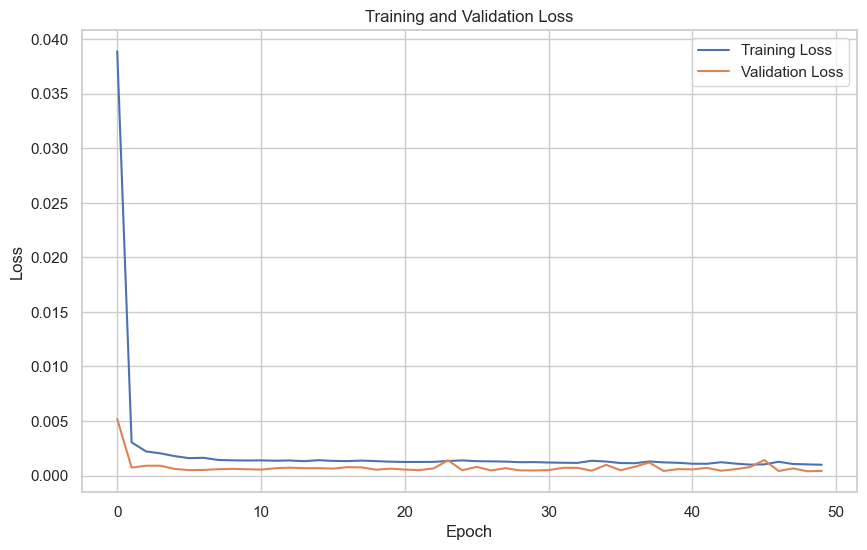

In [226]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Training vs. Validation Loss: If the validation loss starts to increase while the training loss continues to decrease, it indicates overfitting.
Training vs. Test R^2 Scores: If the R^2 score for the training set is much higher than for the test set, the model is likely overfitting.


#### Trying improving the accuracy

In [227]:
# Selecting the 'Close' price as the target variable and other features
features = hsbc[['Close_ma', 'Close_ema']]
target = hsbc['Close']

# Normalize the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))

# Train-Test Split
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Reshape for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [228]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [229]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, 
                    verbose=1, callbacks=[early_stop])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1491 - val_loss: 0.1333
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0355 - val_loss: 0.0034
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 - val_loss: 0.0199
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0113 - val_loss: 0.0038
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 - val_loss: 0.0055
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 - val_loss: 0.0035
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - val_loss: 0.0036
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0039
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - val_loss: 0.0036
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - val_loss: 0.0037
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


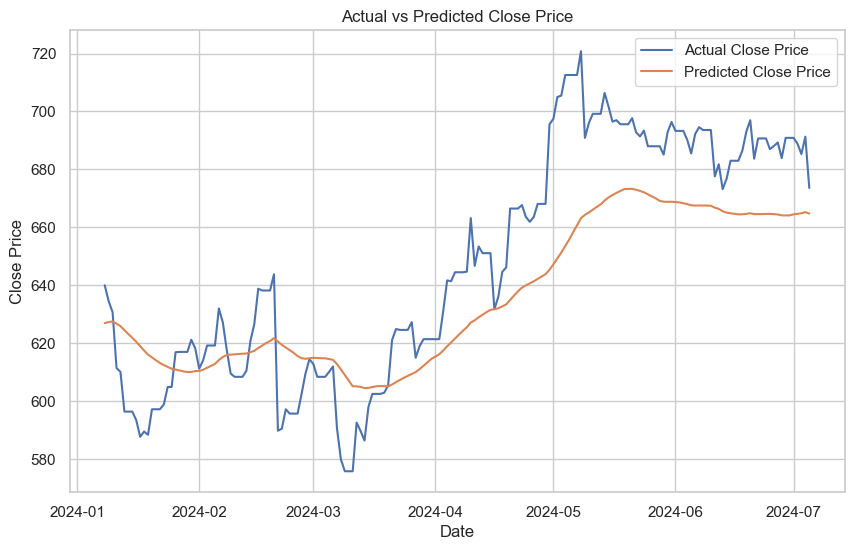

In [230]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_test_unscaled = scaler_y.inverse_transform(y_test)
y_pred_unscaled = scaler_y.inverse_transform(y_pred)

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(hsbc.index[-len(y_test_unscaled):], y_test_unscaled, label='Actual Close Price')
plt.plot(hsbc.index[-len(y_test_unscaled):], y_pred_unscaled, label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [231]:
# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
r2_test = r2_score(y_test_unscaled, y_pred_unscaled)

# Predict on training set to compare
y_train_pred = model.predict(X_train)

# Inverse transform predictions and actual values for training set
y_train_unscaled = scaler_y.inverse_transform(y_train)
y_train_pred_unscaled = scaler_y.inverse_transform(y_train_pred)

# Calculate R-squared (R^2) score for training set
r2_train = r2_score(y_train_unscaled, y_train_pred_unscaled)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R^2) score for Test set: {r2_test:.2f}")
print(f"R-squared (R^2) score for Train set: {r2_train:.2f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
Root Mean Squared Error (RMSE): 22.96
Mean Absolute Error (MAE): 19.57
R-squared (R^2) score for Test set: 0.67
R-squared (R^2) score for Train set: 0.63


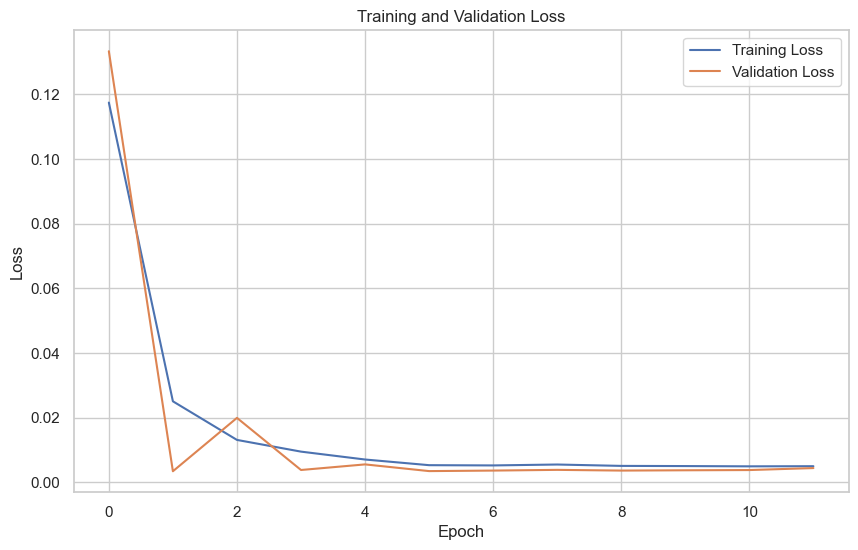

In [232]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [233]:
# Print the summary of the LSTM model
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 2, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,957 (585.77 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 99,972 (390.52 KB)

#### Accuracy doesn't improve, so trying the same model again using sequence.

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1201 - val_loss: 0.0165
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143 - val_loss: 0.0143
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063 - val_loss: 0.0020
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0017
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0016
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - val_loss: 9.8056e-04
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_loss: 9.8555e-04
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 

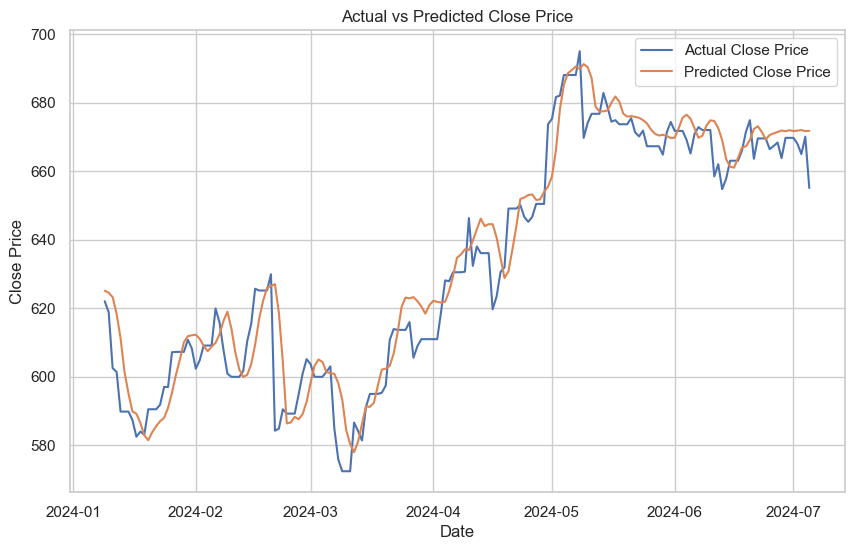

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step
Root Mean Squared Error (RMSE): 9.36
Mean Absolute Error (MAE): 6.90
R-squared (R^2) score for Test set: 0.92
R-squared (R^2) score for Train set: 0.97


In [234]:
# Normalize the features and target
scaler = MinMaxScaler()
hsbc_scaled = pd.DataFrame(scaler.fit_transform(hsbc), columns=hsbc.columns, index=hsbc.index)

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:i+seq_length].values
        y = data.iloc[i+seq_length]['Close']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 3
X, y = create_sequences(hsbc_scaled, seq_length)

# Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, 
                    verbose=1, callbacks=[early_stop])

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_test_unscaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_unscaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred), axis=1))[:, -1]

# Create a DataFrame
result_df = pd.DataFrame({
    'Actual': y_test_unscaled,
    'Predicted': y_pred_unscaled
})

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(hsbc.index[-len(y_test_unscaled):], y_test_unscaled, label='Actual Close Price')
plt.plot(hsbc.index[-len(y_test_unscaled):], y_pred_unscaled, label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
r2_test = r2_score(y_test_unscaled, y_pred_unscaled)

# Predict on training set to compare
y_train_pred = model.predict(X_train)

# Inverse transform predictions and actual values for training set
y_train_unscaled = scaler.inverse_transform(np.concatenate((X_train[:, -1, :-1], y_train.reshape(-1, 1)), axis=1))[:, -1]
y_train_pred_unscaled = scaler.inverse_transform(np.concatenate((X_train[:, -1, :-1], y_train_pred), axis=1))[:, -1]

# Calculate R-squared (R^2) score for training set
r2_train = r2_score(y_train_unscaled, y_train_pred_unscaled)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R^2) score for Test set: {r2_test:.2f}")
print(f"R-squared (R^2) score for Train set: {r2_train:.2f}")


In [235]:
result_df

,Actual,Predicted
0,622.018623,625.080962
1,618.800994,624.494648
2,602.458784,623.204260
3,601.357972,618.368851
4,589.757576,611.226544
...,...,...
174,669.775184,671.770221
175,668.081690,671.883820
176,665.033370,672.061508
177,670.113853,671.732847


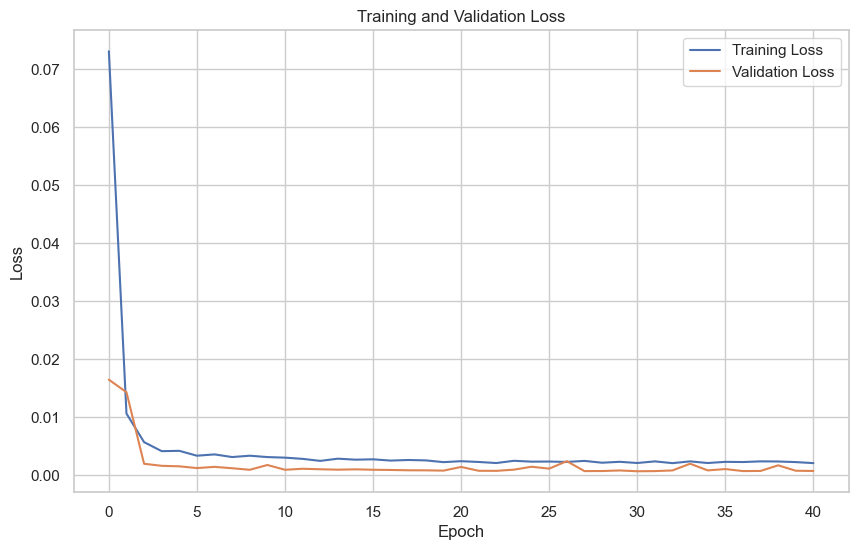

In [236]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### Importance of Sequence in LSTM model

##### Sequences in LSTM models help in capturing and learning from temporal relationships in the data, enabling the model to make predictions based on the historical context. This is crucial for tasks involving time-series data, where understanding how past values influence future values is key to accurate forecasting.

In [237]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 3, 64)          │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,333 (606.77 KB)

 Trainable params: 51,777 (202.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 103,556 (404.52 KB)

##### Model Comparison

#### model 1

| Metric                        | Value  |
|-------------------------------|--------|
| Root Mean Squared Error (RMSE)| 9.34   |
| Mean Absolute Error (MAE)     | 6.98   |
| R-squared (R²) score (Test set)| 0.93   |
| R-squared (R²) score (Train set)| 0.97   |

#### model2

| Metric                        | Value  |
|-------------------------------|--------|
| Root Mean Squared Error (RMSE)| 24.20  |
| Mean Absolute Error (MAE)     | 20.68  |
| R-squared (R²) score (Test set)| 0.64   |
| R-squared (R²) score (Train set)| 0.66   |

### Conclusion

Model 1 outperforms Model 2 across all key metrics:

RMSE and MAE are significantly lower in Model 1, indicating that the predictions are more accurate and less error-prone.
R² scores for both test and train sets are higher in Model 1, suggesting a better fit and a higher proportion of variance explained by the model.
Therefore, Model 1 is the better model based on the given evaluation metrics. It provides more accurate predictions and better generalizes to both the training and test datasets.

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [239]:
# Extracting relevant features and target variable
features = ['Volume', 'Close_ma', 'Close_ema']
target = 'Close'

# Sort the DataFrame by date
hsbc = hsbc.sort_index()

X = hsbc[features]
y = hsbc[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate performance metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results[name] = {
        'RMSE Train': rmse_train,
        'MAE Train': mae_train,
        'R2 Train': r2_train,
        'RMSE Test': rmse_test,
        'MAE Test': mae_test,
        'R2 Test': r2_test
    }

# Print results as a table
print("| Model              | RMSE Train | MAE Train | R2 Train | RMSE Test | MAE Test | R2 Test |")
print("|--------------------|------------|-----------|----------|-----------|----------|---------|")
for name, metrics in results.items():
    print(f"| {name:<18} | {metrics['RMSE Train']:<10.2f} | {metrics['MAE Train']:<9.2f} | {metrics['R2 Train']:<8.2f} | {metrics['RMSE Test']:<9.2f} | {metrics['MAE Test']:<8.2f} | {metrics['R2 Test']:<7.2f} |")

# Plotting the actual vs predicted prices for the best model
best_model_name = max(results, key=lambda x: results[x]['R2 Test'])
best_model = models[best_model_name]
y_test_pred = best_model.predict(X_test_scaled)

| Model              | RMSE Train | MAE Train | R2 Train | RMSE Test | MAE Test | R2 Test |
|--------------------|------------|-----------|----------|-----------|----------|---------|
| Linear Regression  | 11.67      | 9.11      | 0.95     | 11.41     | 9.27     | 0.92    |
| Decision Tree      | 0.00       | 0.00      | 1.00     | 35.66     | 27.79    | 0.21    |
| Gradient Boosting  | 8.96       | 6.80      | 0.97     | 33.19     | 25.35    | 0.32    |


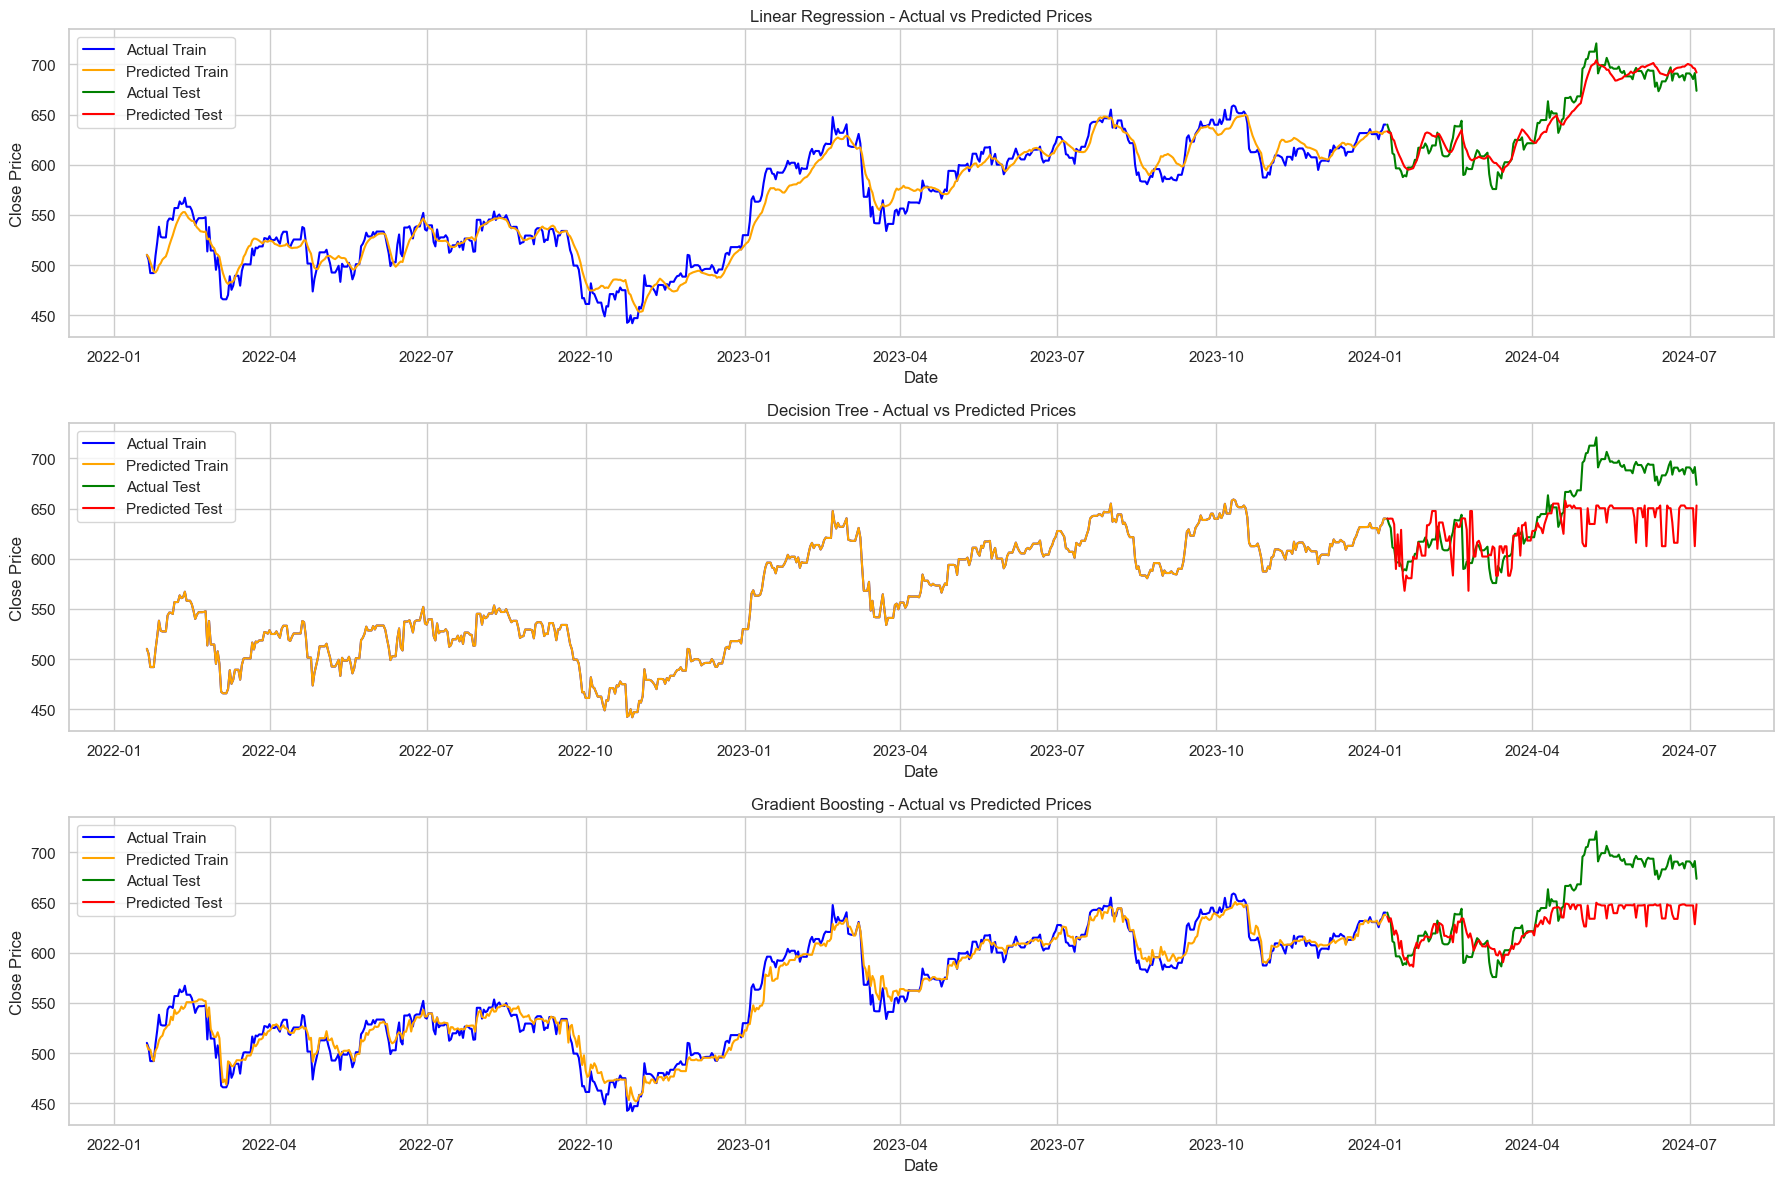

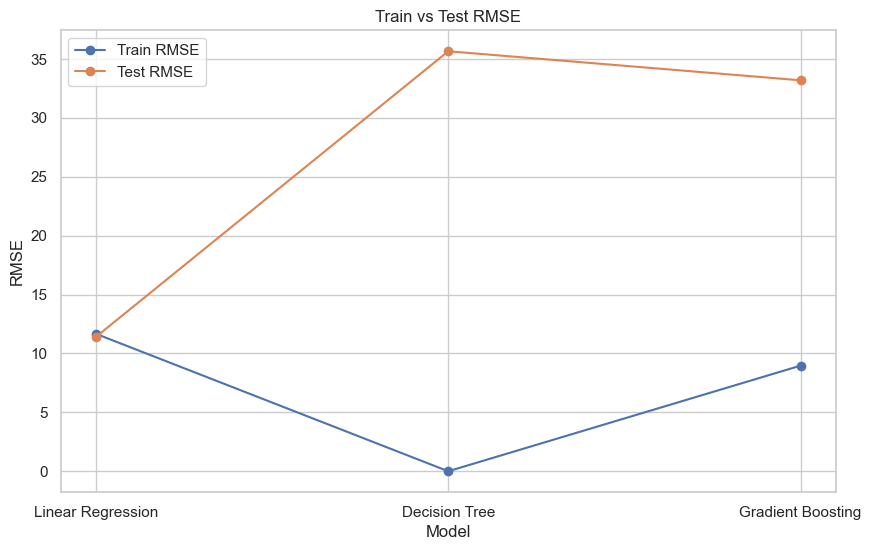

In [240]:
# Plot Actual vs Predicted Prices with Dates on X-axis
plt.figure(figsize=(18, 12))

for i, (name, model) in enumerate(models.items(), start=1):
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    plt.subplot(3, 1, i)
    plt.plot(y_train.index, y_train, label='Actual Train', color='blue')
    plt.plot(y_train.index, y_train_pred, label='Predicted Train', color='orange')
    plt.plot(y_test.index, y_test, label='Actual Test', color='green')
    plt.plot(y_test.index, y_test_pred, label='Predicted Test', color='red')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'{name} - Actual vs Predicted Prices')
    plt.legend()

plt.tight_layout()
plt.show()

# Plot Training and Test Loss Curves
train_rmse = {}
test_rmse = {}

for name, model in models.items():
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate RMSE for Train and Test
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    train_rmse[name] = rmse_train
    test_rmse[name] = rmse_test

plt.figure(figsize=(10, 6))

# Plot RMSE for each model
plt.plot(list(train_rmse.keys()), list(train_rmse.values()), label='Train RMSE', marker='o')
plt.plot(list(test_rmse.keys()), list(test_rmse.values()), label='Test RMSE', marker='o')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Train vs Test RMSE')
plt.legend()

plt.show()
